In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# load AmeriFlux and OpenETa data
AmeriFlux_US_Myb = pd.read_excel(r'D:\My PhD\Summer 2024\I_GUIDE\Data\AmeriFlux_ETa\All_Tower_Clean_data.xlsx', sheet_name = 'US-Myb', parse_dates = ['Date'])
OpenETa_US_Myb = pd.read_csv(r'D:\My PhD\Summer 2024\I_GUIDE\Data\OpenETa\OpenETa_US_Myb_station_2019_2021.csv', parse_dates = ['Date'])

In [8]:
AmeriFlux_US_Myb .head(5)

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa
0,2010-01-01,Mayberry Wetland,10.767,64.252,345.117,2.622,102.445,0.001,1.328,57.7050,23.93270,2.013958
1,2010-01-02,Mayberry Wetland,11.230,86.497,332.308,2.044,102.244,0.219,1.208,38.9442,1.40294,1.359789
2,2010-01-03,Mayberry Wetland,7.749,96.941,290.054,1.599,101.939,0.005,1.889,54.8205,10.70620,1.907795
3,2010-01-04,Mayberry Wetland,8.396,132.200,274.652,2.136,101.889,0.000,1.482,57.7050,23.93270,2.009414
4,2010-01-05,Mayberry Wetland,7.649,88.983,295.321,2.222,101.942,0.003,0.958,38.9442,1.40294,1.355159


In [9]:
OpenETa_US_Myb.head(5)

,Date,OpenETa
0,2019-01-01,1.636
1,2019-01-02,1.013
2,2019-01-03,1.013
3,2019-01-04,0.857
4,2019-01-05,0.935


In [12]:
# Filter the DataFrame to include only the dates from 2019 to 2021
AmeriFlux_US_Myb_filtered= AmeriFlux_US_Myb[(AmeriFlux_US_Myb['Date'] >= '2019-01-01') & (AmeriFlux_US_Myb['Date'] <= '2021-12-31')]

In [14]:
AmeriFlux_US_Myb_filtered.head(5)

,Date,Site_Name,TA,SW_IN,LW_IN,VPD,PA,P,WS,LE,H,ETa
3287,2019-01-01,Mayberry Wetland,7.393,138.181,235.861,5.939,101.911,0.00,4.476,53.17560,-27.05330,1.849925
3288,2019-01-02,Mayberry Wetland,5.878,133.203,255.465,3.980,102.065,0.00,0.980,9.46971,9.17483,0.328968
3289,2019-01-03,Mayberry Wetland,5.731,109.751,262.336,2.394,101.954,0.00,0.752,6.29387,6.97858,0.218612
3290,2019-01-04,Mayberry Wetland,4.079,111.281,265.310,1.632,101.199,0.00,0.897,6.42967,9.12483,0.222979
3291,2019-01-05,Mayberry Wetland,6.634,37.326,315.793,1.895,100.461,2.54,2.096,6.90846,-16.83860,0.240165


Text(0, 0.5, 'Actual Evapotranspiration in mm/day')

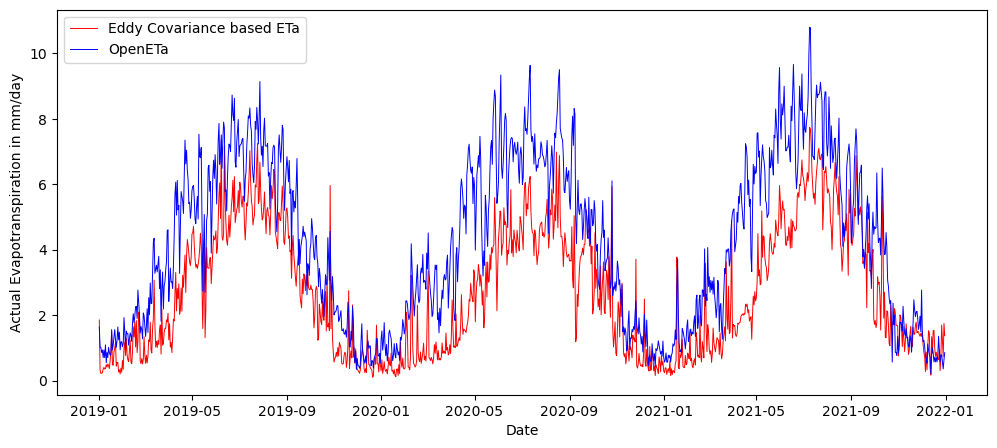

In [28]:
# plot time series of OpenETa and ETa from eddy covariance tower
plt.figure(figsize = (12, 5))
plt.plot(AmeriFlux_US_Myb_filtered['Date'], AmeriFlux_US_Myb_filtered['ETa'], color = 'r', linewidth = 0.7, label = 'Eddy Covariance based ETa')
plt.plot(OpenETa_US_Myb['Date'], OpenETa_US_Myb['OpenETa'], color = 'b', linewidth = 0.7, label = 'OpenETa')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Actual Evapotranspiration in mm/day')

In [38]:
# Statistical indicators
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(AmeriFlux_US_Myb_filtered['ETa'],OpenETa_US_Myb['OpenETa'])
mse = mean_squared_error(AmeriFlux_US_Myb_filtered['ETa'],OpenETa_US_Myb['OpenETa'])
rmse = np.sqrt(mse)
print(f'R2: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f} mm/day')

R2: -0.01
MSE: 3.70
RMSE: 1.92 mm/day


In [39]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(AmeriFlux_US_Myb_filtered['ETa'], OpenETa_US_Myb['OpenETa'])

# Print the results
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("The difference between the two ETa datasets is statistically significant.")
else:
    print("The difference between the two ETa datasets is not statistically significant.")

T-statistic: -15.98
P-value: 0.0000
The difference between the two ETa datasets is statistically significant.
